# Performance comparison of inference on cell cycle

Notebook compares metrics for velocity, latent time and GRN inference across different methods applied to cell cycle data.

## Library imports

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

from rgv_tools import DATA_DIR, FIG_DIR

## General settings

In [2]:
DATASET = "cell_cycle"

In [3]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

FIGURE_FORMATE = "svg"

## Constants

In [4]:
NN_SCALE = [10, 30, 50, 70, 90, 100]
VELO_METHODS = ["regvelo", "velovi"]

In [5]:
VELO_METHOD_PALETTE = {
    "regvelo": "#0173b2",
    "velovi": "#de8f05",
}

## Velocity loading

In [6]:
## Velocity
confi_df = []

for scale in NN_SCALE:
    df = pd.read_parquet(DATA_DIR / "results" / f"regvelo_confidence_velocity_{scale}.parquet")
    df["scale"] = scale
    confi_df.append(df)

confi_df = pd.concat(confi_df, axis=0)

## Confidence

In [7]:
confi_df

velocity_consistency     Dataset   Method  scale
0                 0.941898  Cell cycle  regvelo     10
1                 0.951289  Cell cycle  regvelo     10
2                 0.904966  Cell cycle  regvelo     10
3                 0.541206  Cell cycle  regvelo     10
4                 0.886754  Cell cycle  regvelo     10
...                    ...         ...      ...    ...
1141              0.981466  Cell cycle  regvelo    100
1142              0.918879  Cell cycle  regvelo    100
1143              0.921603  Cell cycle  regvelo    100
1144              0.963663  Cell cycle  regvelo    100
1145              0.952200  Cell cycle  regvelo    100

[6876 rows x 4 columns]

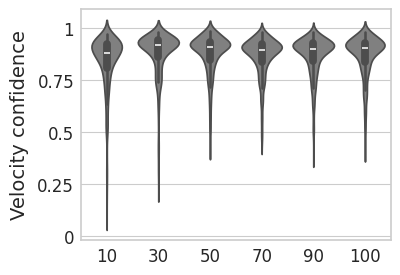

In [8]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(4, 3), sharey=True)
    sns.violinplot(
        data=confi_df,
        ax=ax,
        # orient="h",
        x="scale",
        y="velocity_consistency",
        color="grey",
        order=NN_SCALE,
    )
    # plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1])
    ax.set_ylabel("Velocity confidence", fontsize=14)
    ax.set_xlabel("")
    plt.show()

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / "velocity_confidence_compare.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()

## Compare on each level

In [9]:
confi_dfs = []
for scale in NN_SCALE:
    confi_df = []
    for method in VELO_METHODS:
        df = pd.read_parquet(DATA_DIR / "results" / f"{method}_confidence_velocity_{scale}_nn30.parquet")
        confi_df.append(df)

    confi_df = pd.concat(confi_df, axis=0)
    confi_df["Scale"] = scale
    confi_dfs.append(confi_df)

In [10]:
confi_dfs = pd.concat(confi_dfs)

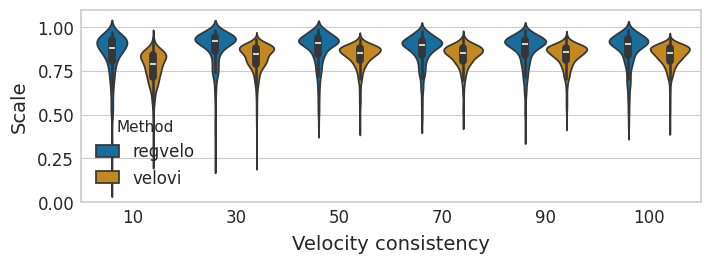

In [11]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(8, 2.5))
    sns.violinplot(
        data=confi_dfs,
        y="velocity_consistency",
        x="Scale",
        hue="Method",
        hue_order=["regvelo", "velovi"],
        palette=VELO_METHOD_PALETTE,
        ax=ax,
    )

    ax.set(
        xlabel="Velocity consistency",
        ylabel="Scale",
        yticks=ax.get_yticks(),
    )
    ax.set_ylim(0, 1.1)

    fig.savefig(
        FIG_DIR / "velocity_confidence.svg",
        format="svg",
        transparent=True,
        bbox_inches="tight",
    )

    plt.show()

In [12]:
confi_dfs_velo = confi_dfs.copy()

In [13]:
confi_dfs = []
for scale in NN_SCALE:
    confi_df = []
    for method in VELO_METHODS:
        df = pd.read_parquet(DATA_DIR / "results" / f"{method}_confidence_time_{scale}_nn30.parquet")
        confi_df.append(df)

    confi_df = pd.concat(confi_df, axis=0)
    confi_df["Scale"] = scale
    confi_dfs.append(confi_df)

In [14]:
confi_dfs = pd.concat(confi_dfs)

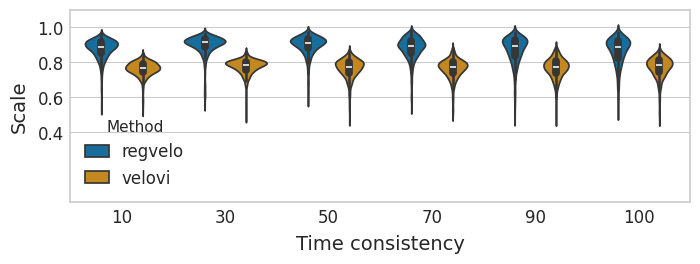

In [15]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(8, 2.5))
    sns.violinplot(
        data=confi_dfs,
        y="fit_t_consistency",
        x="Scale",
        hue="Method",
        hue_order=["regvelo", "velovi"],
        palette=VELO_METHOD_PALETTE,
        ax=ax,
    )

    ax.set(
        xlabel="Time consistency",
        ylabel="Scale",
        yticks=ax.get_yticks(),
    )
    ax.set_ylim(0, 1.1)

    fig.savefig(
        FIG_DIR / "time_confidence.svg",
        format="svg",
        transparent=True,
        bbox_inches="tight",
    )

    plt.show()

In [16]:
confi_dfs_time = confi_dfs.copy()

In [18]:
confi_dfs_velo_ratio = []
for scale in np.unique(confi_dfs_velo["Scale"]):
    dat = pd.DataFrame()
    repeat = int(int(np.sum(confi_dfs_velo["Scale"] == scale)) / 2)
    dat["Scale"] = [scale] * repeat
    velo_reg = confi_dfs_velo.loc[
        (confi_dfs_velo["Scale"] == scale) * (confi_dfs_velo["Method"] == "regvelo"), "velocity_consistency"
    ]
    velo_vi = confi_dfs_velo.loc[
        (confi_dfs_velo["Scale"] == scale) * (confi_dfs_velo["Method"] == "velovi"), "velocity_consistency"
    ]
    dat["Ratio"] = velo_reg / velo_vi
    dat["Class"] = ["velocity"] * repeat
    confi_dfs_velo_ratio.append(dat)

In [19]:
confi_dfs_time_ratio = []
for scale in np.unique(confi_dfs_time["Scale"]):
    dat = pd.DataFrame()
    repeat = int(int(np.sum(confi_dfs_time["Scale"] == scale)) / 2)
    dat["Scale"] = [scale] * repeat
    time_reg = confi_dfs_time.loc[
        (confi_dfs_time["Scale"] == scale) * (confi_dfs_time["Method"] == "regvelo"), "fit_t_consistency"
    ]
    time_vi = confi_dfs_time.loc[
        (confi_dfs_time["Scale"] == scale) * (confi_dfs_time["Method"] == "velovi"), "fit_t_consistency"
    ]
    dat["Ratio"] = time_reg / time_vi
    dat["Class"] = ["time"] * repeat
    confi_dfs_time_ratio.append(dat)

In [20]:
confi_dfs_velo_ratio = pd.concat(confi_dfs_velo_ratio)
confi_dfs_time_ratio = pd.concat(confi_dfs_time_ratio)
confi_df_all = pd.concat([confi_dfs_velo_ratio, confi_dfs_time_ratio])

In [21]:
confi_df_all

Scale     Ratio     Class
0        10  1.111715  velocity
1        10  1.087845  velocity
2        10  1.113454  velocity
3        10  0.976719  velocity
4        10  1.001859  velocity
...     ...       ...       ...
1141    100  1.124350      time
1142    100  1.139394      time
1143    100  1.109670      time
1144    100  1.142055      time
1145    100  1.176460      time

[13752 rows x 3 columns]

In [22]:
confi_df_all["Scale"] = confi_df_all["Scale"].astype(str)

In [23]:
confi_df_all["Ratio"] = confi_df_all["Ratio"].astype(np.float32)

In [24]:
confi_df_all["Ratio"] = np.log2(confi_df_all["Ratio"])

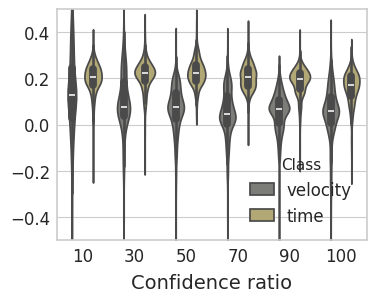

In [25]:
custom_palette = {
    "velocity": "#7D7C78",  # Elegant blue (colorblind-friendly)
    "time": "#BCAE6C",  # Gold-orange (also friendly and high contrast)
}

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(4, 3), sharey=True)
    sns.violinplot(
        data=confi_df_all,
        ax=ax,
        y="Ratio",
        x="Scale",
        hue="Class",
        palette=custom_palette,
    )
    # plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_ylim(-0.5, 0.5)
    # ax.set_yticklabels([0,0.25, 0.5, 0.75,1]);
    ax.set_xlabel("Confidence ratio", fontsize=14)
    ax.set_ylabel("")
    plt.show()

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / "confi_all_kinetics.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()